In [1]:
#import Laibary
#unnassary output not show
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#import dataset
df = pd.read_csv("Mall_Customers.csv")

In [3]:
#dataset 1st 5 row show
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#dataset last 5 row show
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
#dataset size
df.shape

(200, 5)

In [6]:
#dataset all information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#dataset null valu chak
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#dataset columns name
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
#CustomerID delete
df.drop("CustomerID",axis=1,inplace=True)

In [10]:
#daraset 1st 5 row show
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

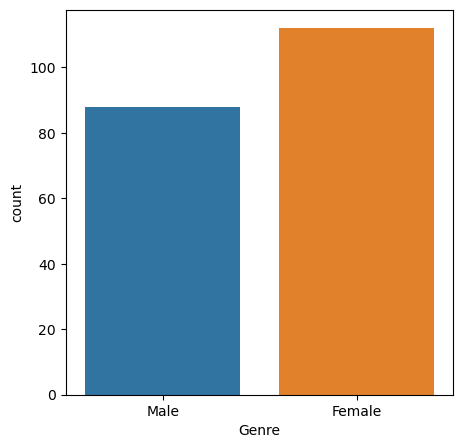

In [12]:
plt.figure(figsize=(5,5))
sns.countplot("Genre",data=df)
plt.show()

In [13]:
df.Age.value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

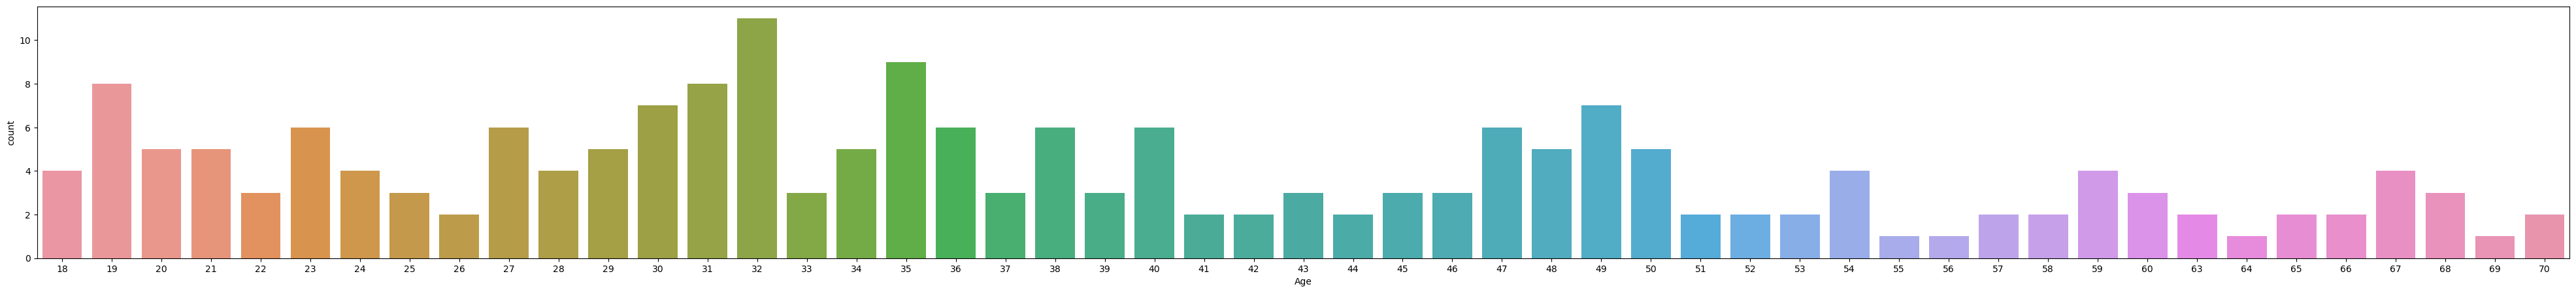

In [14]:
plt.figure(figsize=(50,5))
sns.countplot("Age",data=df)
plt.show()

In [15]:
df["Annual Income (k$)"].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

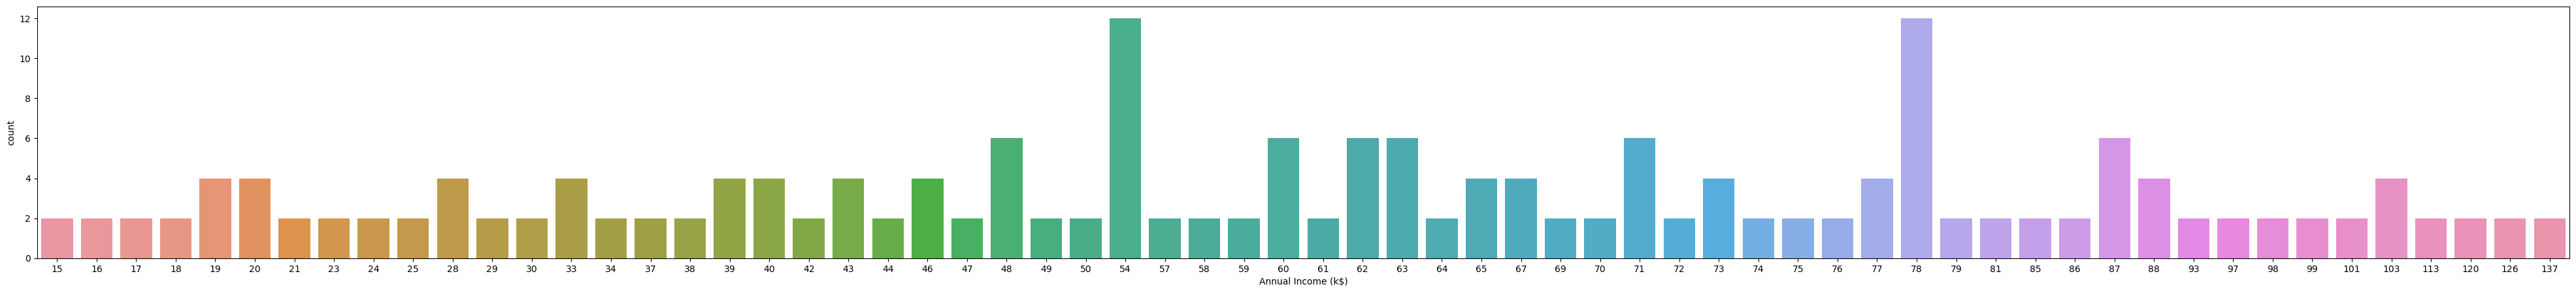

In [16]:
plt.figure(figsize=(50,5))
sns.countplot("Annual Income (k$)",data=df)
plt.show()

In [17]:
df["Spending Score (1-100)"].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

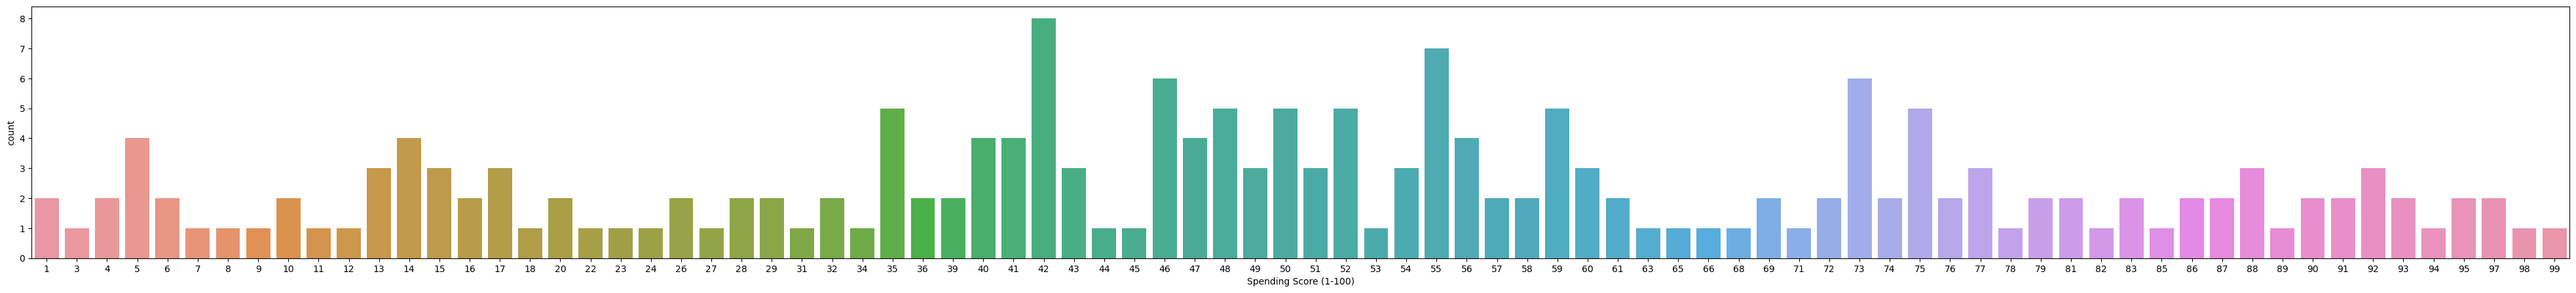

In [18]:
plt.figure(figsize=(50,5))
sns.countplot("Spending Score (1-100)",data=df)
plt.show()

# Encoding

In [19]:
#import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [20]:
#creating LabelEncoder object
le = LabelEncoder()

In [21]:
#import is_numeric_dtype
from pandas.core.dtypes.common import is_numeric_dtype

In [22]:
#all dataset encoding
for columns in df:
    if is_numeric_dtype(df[columns]):
        continue
    else:
        df[columns] = le.fit_transform(df[[columns]])

In [23]:
#dataset 1st 5 row show
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [24]:
#Female = 0
#Male = 1 
df.Genre.value_counts()

0    112
1     88
Name: Genre, dtype: int64

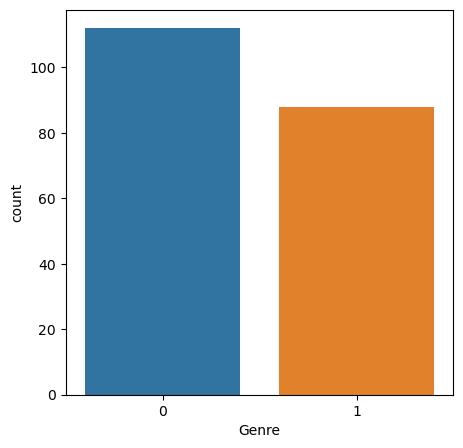

In [25]:
plt.figure(figsize=(5,5))
sns.countplot("Genre",data=df)
plt.show()

<Figure size 1500x500 with 0 Axes>

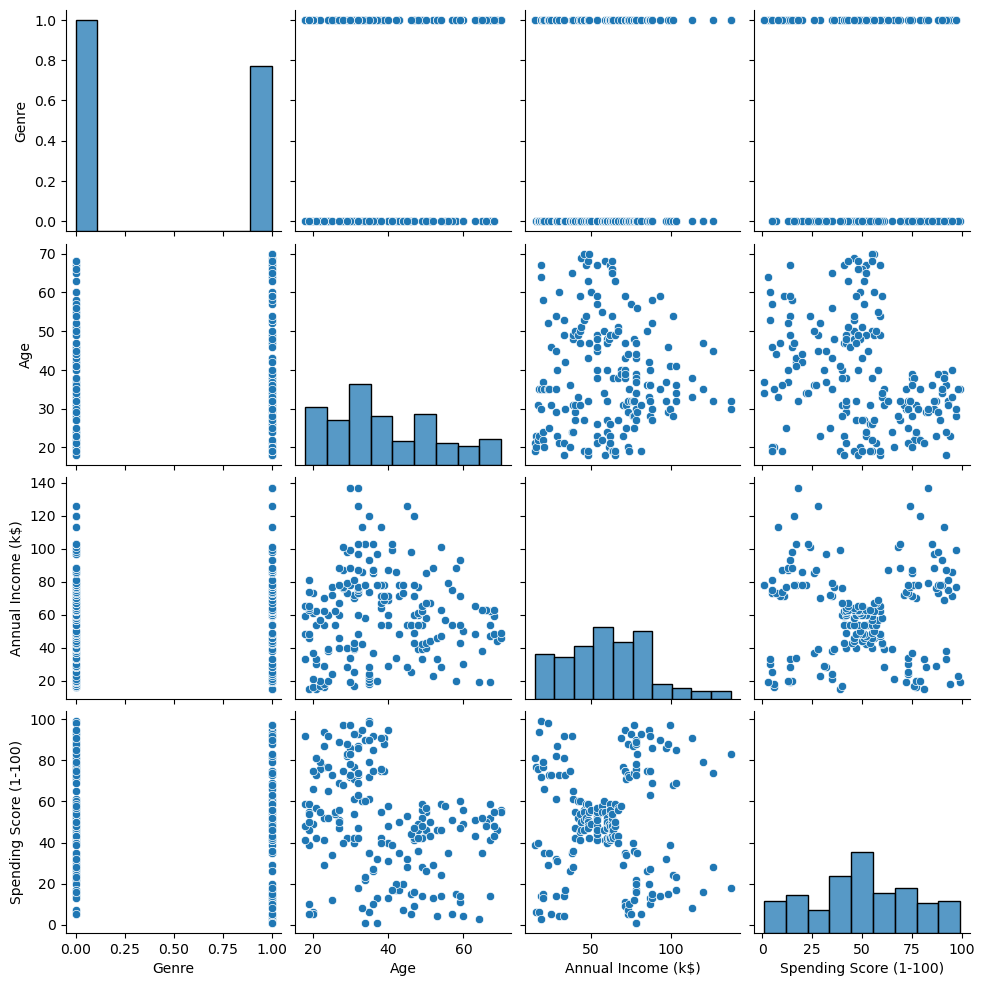

In [26]:
plt.figure(figsize=(15,5))
sns.pairplot(df)
plt.show()

<Figure size 1500x500 with 0 Axes>

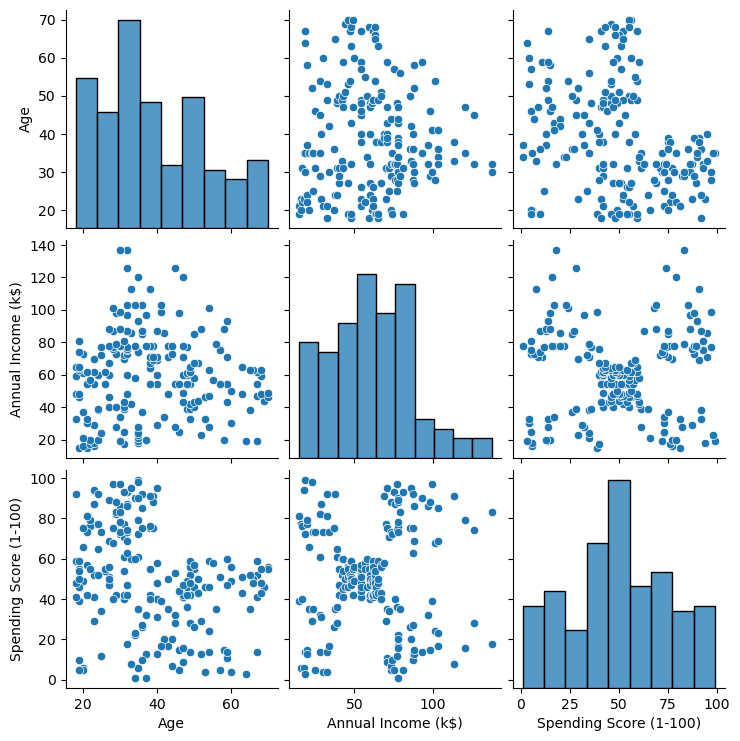

In [27]:
plt.figure(figsize=(15,5))
sns.pairplot(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])
plt.show()

# K-Means Cluster

In [28]:
import sklearn.cluster as cluster

In [29]:
wcss = []
for i in range(1,15):
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit_predict(df[["Annual Income (k$)","Spending Score (1-100)"]])
    wcss.append(kmeans.inertia_)
    

In [30]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37271.88623658949,
 30227.606513152015,
 24990.4343103969,
 22131.92051101073,
 19634.55462934998,
 17602.19046838677,
 16429.947379813173,
 14312.775620051409,
 12813.669618144619]

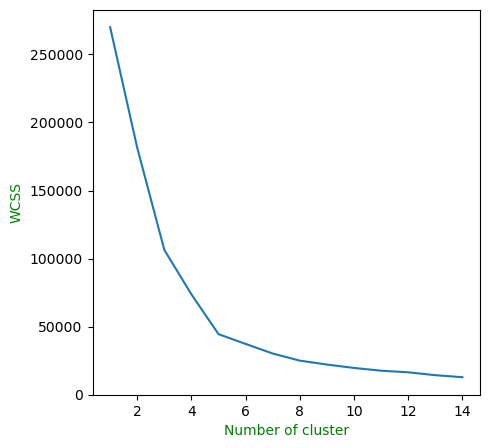

In [31]:
plt.figure(figsize=(5,5))
plt.plot(range(1,15),wcss)
plt.xlabel("Number of cluster",color = "green")
plt.ylabel("WCSS",color = "green")
plt.show()

In [32]:
from kneed import KneeLocator

In [33]:
knlo = KneeLocator(range(1,15),wcss,curve="convex",direction="decreasing")

In [34]:
knlo.knee

5

<Figure size 500x500 with 0 Axes>

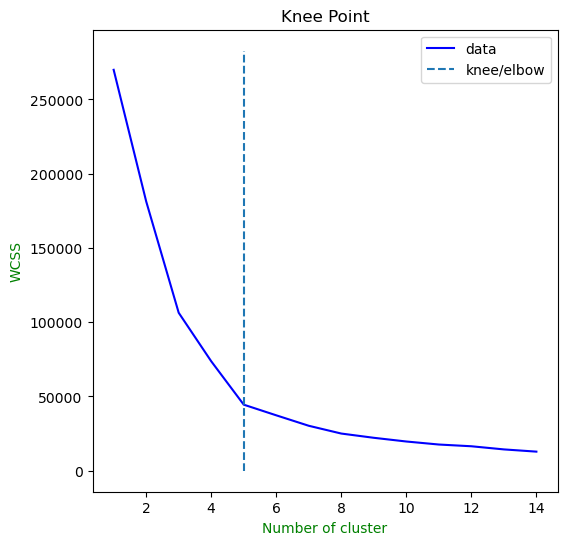

In [35]:
plt.figure(figsize=(5,5))
knlo.plot_knee()
plt.xlabel("Number of cluster",color = "green")
plt.ylabel("WCSS",color = "green")
plt.show()

In [36]:
kmeans = cluster.KMeans(n_clusters=5,random_state=42)

In [37]:
kmeans.fit_predict(df[["Annual Income (k$)","Spending Score (1-100)"]])

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [38]:
df["Cluster"] = kmeans.fit_predict(df[["Annual Income (k$)","Spending Score (1-100)"]])

In [39]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,3
4,0,31,17,40,2


In [40]:
kmeans.predict([[20,80]])

array([3])

In [41]:
center = kmeans.cluster_centers_

In [42]:
center

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

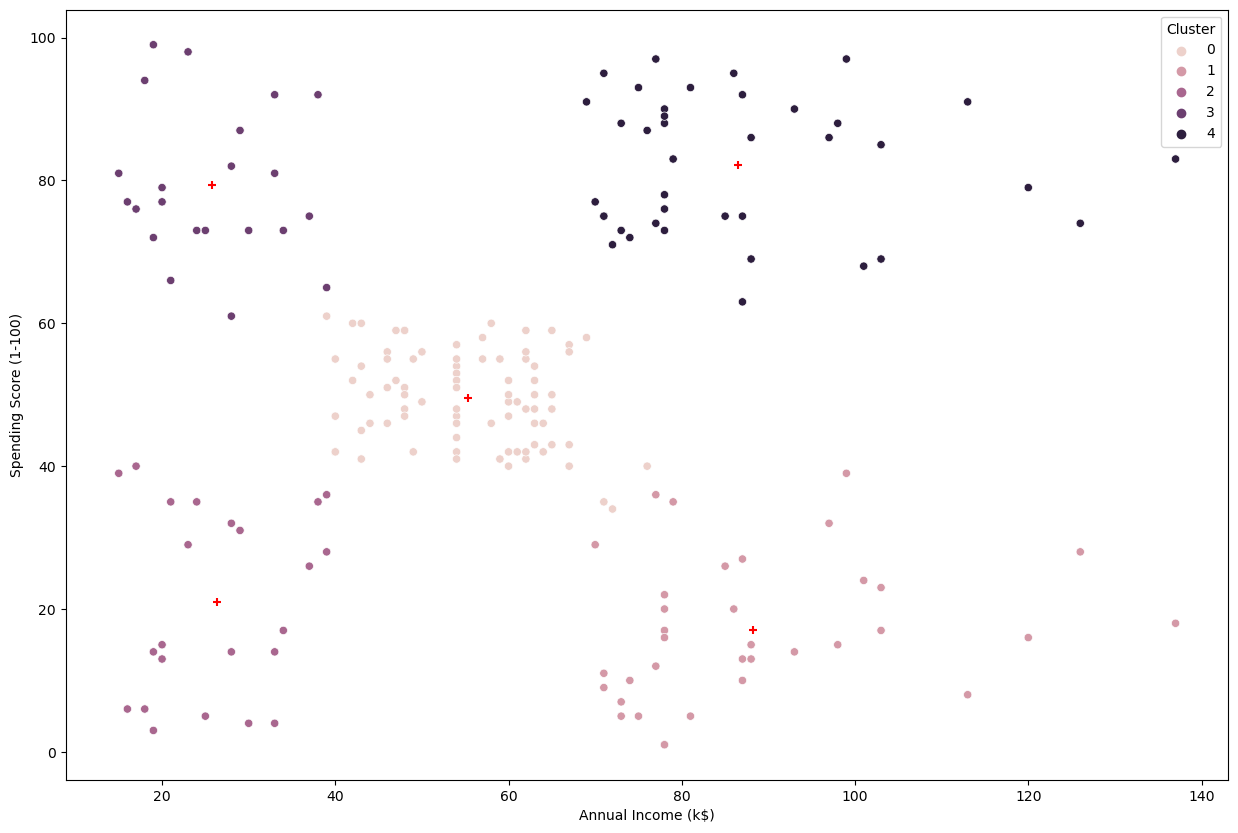

In [43]:
plt.figure(figsize=(15,10))
sns.scatterplot("Annual Income (k$)","Spending Score (1-100)",hue="Cluster",data=df)
plt.scatter(center[:,0],center[:,1],color = "red",marker="+")
plt.show()

# Download Machine Learning Model

In [44]:
import pickle as pk

In [45]:
pk.dump(kmeans,open("Customers Charm Prediction Machine Learning Model","wb"))

In [46]:
model = pk.load(open("Customers Charm Prediction Machine Learning Model","rb"))

In [47]:
Annual_Income = float(input("Enter Annual Income(k$) = "))
Spending_Score = float(input("Enter Spending Score 1 t0 100 = "))

result = model.predict([[Annual_Income,Spending_Score]])
if result == 0:
    print("Medium Annual Income & Medium Spending Score")
elif result == 1:
    print("Hight Annual Income & Low Spending Score")
elif result == 2:
    print("Low Annual Income & Low Spending Score")
elif result == 3:
    print("Low Annual Income & Hight Spending Score")
else:
    print("Hight Annual Income & Hight Spending Score")

Enter Annual Income(k$) = 50
Enter Spending Score 1 t0 100 = 60
Medium Annual Income & Medium Spending Score
